In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [6]:
cols=['user_id','prod_id','rating']

In [7]:
ratings_df=pd.read_csv('ratings_Electronics.xls', names=cols)

In [8]:
ratings_df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,132793040,5
1,A2CX7LUOHB2NDG,321732944,5
2,A2NWSAGRHCP8N5,439886341,1
3,A2WNBOD3WNDNKT,439886341,3
4,A1GI0U4ZRJA8WN,439886341,1


In [9]:
ratings_df.dtypes

user_id    object
prod_id    object
rating      int64
dtype: object

In [10]:
ratings_df.shape

(1048576, 3)

In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
user_id    1048576 non-null object
prod_id    1048576 non-null object
rating     1048576 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


(array([128251.,      0.,  62644.,      0.,      0.,  83509.,      0.,
        208535.,      0., 565637.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

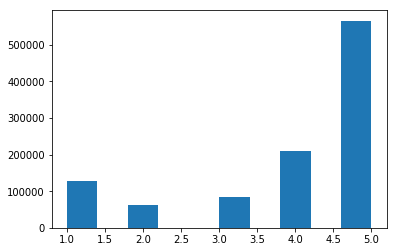

In [12]:
plt.hist(ratings_df['rating'])

In [13]:
#2. Take subset of dataset to make it less sparse/more dense. 
#(For example, keep the users only who has given 50 or more number of ratings )

In [14]:
#I am keeping users who has given more than 50 ratings because If I keep even 25 or 10 ., it is throwing memory error,
#system computation ability is not sufficient enough to do the calculation

In [15]:
max_ratings=ratings_df["user_id"].value_counts()

In [16]:
max_ratings.index.values

array(['A5JLAU2ARJ0BO', 'A231WM2Z2JL0U3', 'A25HBO5V8S8SEA', ...,
       'A2LPT1FQQV4DUB', 'A2G4WGZLCVKXE5', 'A2OJON138ZSPA8'], dtype=object)

In [17]:
max_ratings_df=pd.DataFrame()

In [18]:
max_ratings_df['userid']=max_ratings.index.values

In [19]:
max_ratings_df['ratings']=max_ratings.values

In [20]:
max_ratings_df.shape

(786330, 2)

In [21]:
max_ratings_df=max_ratings_df[max_ratings_df['ratings']>= 50]

In [22]:
final_ratings_df=ratings_df[ratings_df['user_id'].isin(max_ratings_df['userid'])]

In [23]:
final_ratings_df.shape

(3456, 3)

In [24]:
#4. Build Popularity Recommender model.

In [25]:
popularity_model_df = final_ratings_df.groupby(['prod_id']).agg({'rating': 'count'}).reset_index()
popularity_model_df.sort_values('rating',ascending = 0).head(5)

,prod_id,rating
146,B00004SB92,7
1199,B00008OE6I,5
2542,B000BKJZ9Q,5
1073,B00007KDVI,5
479,B00005LEN4,5


In [26]:
popularity_model_df = final_ratings_df.groupby(['prod_id']).agg({'rating': 'count'}).reset_index()
popularity_model_df.sort_values('rating',ascending = 0).head(5)

,prod_id,rating
146,B00004SB92,7
1199,B00008OE6I,5
2542,B000BKJZ9Q,5
1073,B00007KDVI,5
479,B00005LEN4,5


In [27]:
# The above products are the top 5 recommendations based on the popularity


In [28]:
#3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [29]:
from surprise import Dataset,Reader
rating = Reader(rating_scale=(1, 5))

In [36]:
data = Dataset.load_from_df(final_ratings_df[['user_id', 'prod_id', 'rating']], rating)

In [37]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [38]:
#5. Build Collaborative Filtering model.

In [39]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [40]:
algo = KNNWithMeans(k=5, sim_options={'name': 'cosine', 'user_based': True})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [42]:
#We are using buildnatitest because there is no use with the products which the user has already rated and 
#build_anti_testtest will not consider those records
testset_new = trainset.build_anti_testset()

In [43]:
testset_new[:]

[('A1435P5AMCPB3X', 'B00004Y3V0', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B000A6TNKC', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B000BKJZ9Q', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00000J3NG', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00004T0RC', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B0000CBBNM', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00005S0M5', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00005QFZF', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00006484F', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B0002IQ1I0', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00004Z4ZB', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B0000YPGQY', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B000GHD73Y', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00007MEHB', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B0007XXU2K', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00006IUSY', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B0001DYXOU', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B00008ZPI1', 4.216205043406366),
 ('A1435P5AMCPB3X', 'B0007KX

In [44]:
predictions = algo.test(testset_new[:])

In [45]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [46]:
predictions_df.columns = ["user_id","prod_id","rating"]
predictions_df.sort_values(by = ["user_id", "rating"],ascending=False,inplace=True)

In [ ]:
#6. Evaluate both the models. (Once the model is trained on the training data,
    #it can be used to compute the error (RMSE) on predictions made on the test data.)

In [49]:
#For Popularity Based Models , there wont be any metric for accuracy because we are not predicting the ratings in
#popularity based model . We are finding out the most popular model based on the number of items and showing the top 5 recommendations based 
#on the popularity

In [ ]:
#Accuracy for collab filter model

In [56]:
# compute RMSE
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1697


1.1697263180182405

In [ ]:
#7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products

In [51]:
top_5_recos = predictions_df.groupby("user_id").head(5).reset_index(drop=True)

In [52]:
top_5_recos

,user_id,prod_id,rating
0,AWPODHOB4GFWL,B00005QFZF,5.000000
1,AWPODHOB4GFWL,B0000CEJUO,5.000000
2,AWPODHOB4GFWL,B00008IP5S,5.000000
3,AWPODHOB4GFWL,B0000659UN,5.000000
4,AWPODHOB4GFWL,B00005V619,5.000000
5,AT6CZDCP4TRGA,B0000E1717,5.000000
6,AT6CZDCP4TRGA,B0001F22PA,5.000000
7,AT6CZDCP4TRGA,B00007EDM8,5.000000
8,AT6CZDCP4TRGA,B0007ZAK4O,5.000000
9,AT6CZDCP4TRGA,B0009FUFPG,5.000000


In [ ]:
#8. Summarise your insights.

In [ ]:
#For collab filter model , we are recommending based on user - user interactions . 
#so we have to take cosine similarity as a metric measure to find the users with similar habits
#KNNwithMeans computational ability is not suffiecnt to apply on the whole data set , hence I just tool the users who has rated atleast 
#50 products 
#After the model is trained ,RMSE is around 0.7422

#For popularity based model , there wont be any metric related to the accuracy because we are not predicting any rating
#and giving the top recommendations based on the number of ratings of the product.

In [53]:
#Lets try SVD on the whole dataset as its not giving the memory error problem

In [54]:
from surprise import SVD


In [55]:
data = Dataset.load_from_df(ratings_df[['user_id', 'prod_id', 'rating']], rating)

In [57]:
trainset, testset = train_test_split(data, test_size=.30,random_state=66)

In [58]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [ ]:
test_pred = svd_model.test(testset)

In [60]:
test_predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [61]:
test_predictions_df.columns = ["user_id","prod_id","rating"]
test_predictions_df.sort_values(by = ["user_id", "rating"],ascending=False,inplace=True)

In [62]:
top_5_recos = test_predictions_df.groupby("user_id").head(5).reset_index(drop=True)

In [63]:
top_5_recos

,user_id,prod_id,rating
0,AZZZEWADNFNUM,B00004Y7ZP,1.000000
1,AZZY5UXXCEH60,B000E43GOO,3.974913
2,AZZXZ9EX2JCFJ,B0001FTVE0,3.974913
3,AZZVLOF3WKLFW,B000E8OVNK,1.000000
4,AZZV891DC7X6Q,B00022OBO2,3.974913
5,AZZUX6QT7M1IC,B000H312RK,3.974913
6,AZZUGL25FXYZX,B0001FTVEA,3.974913
7,AZZU0Q1LH17R8,B000IF4TPY,3.974913
8,AZZTOUKVTUMVM,B000F2JUOK,3.974913
9,AZZTA5HXXF7U4,B0002D03ZW,3.974913
